In [70]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from tensorflow.keras.callbacks import EarlyStopping

In [72]:
data_train = 'C:\\Users\\Abiyyu\\Documents\\ML\\datasetCody\\train'
data_test = 'C:\\Users\\Abiyyu\\Documents\\ML\\datasetCody\\test'

In [71]:
img_size = 48

train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale the pixel values (normalization)
    rotation_range=15,  # Random rotation in the range of 15 degrees
    width_shift_range=0.15,  # Random horizontal shifts (15% of total width)
    height_shift_range=0.15,  # Random vertical shifts (15% of total height)
    shear_range=0.15,  # Random shearing transformations
    # zoom_range=0.15,  # Random zoom range
    horizontal_flip=True,  # Randomly flip inputs horizontally

)
validation_datagen = ImageDataGenerator(rescale = 1./255,
    validation_split = 0.2)

In [78]:
train_generator = train_datagen.flow_from_directory(
    directory = data_train,
    target_size = (img_size,img_size),
    batch_size = 64,
    color_mode = "grayscale",
    class_mode = "categorical",
    subset = "training"
)

validation_generator = validation_datagen.flow_from_directory( 
     directory = data_test,
     target_size = (img_size,img_size),
     batch_size = 64,
     color_mode = "grayscale",
     class_mode = "categorical",
     subset = "validation"
)

Found 9527 images belonging to 7 classes.
Found 736 images belonging to 7 classes.


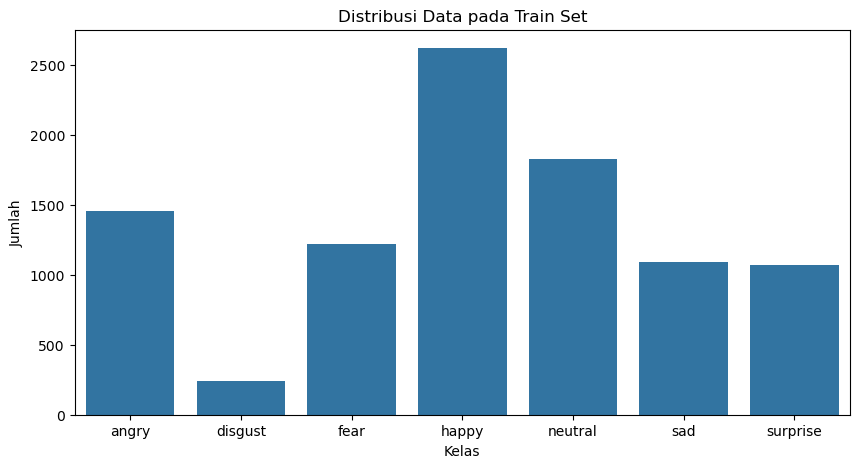

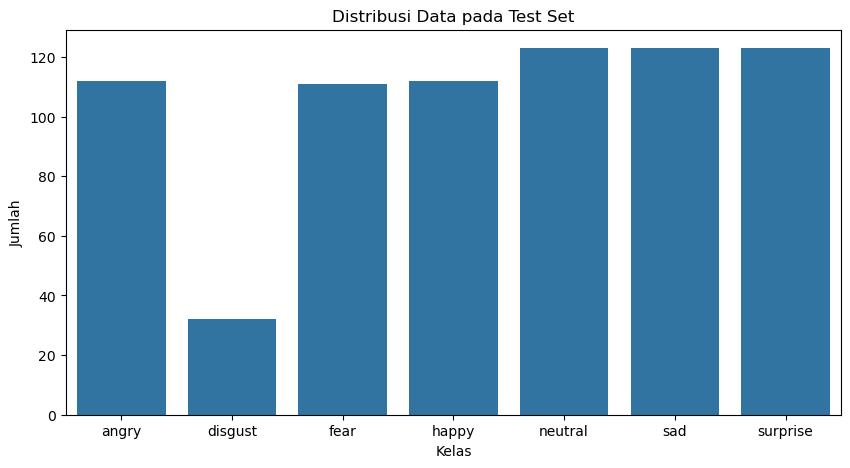

In [79]:
# Visualisasi penyebaran data pada train
train_labels = train_generator.classes
train_class_indices = train_generator.class_indices
train_class_names = list(train_class_indices.keys())

plt.figure(figsize=(10, 5))
sns.countplot(x=train_labels)
plt.title('Distribusi Data pada Train Set')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.xticks(ticks=range(len(train_class_names)), labels=train_class_names)
plt.show()

# Visualisasi penyebaran data pada test
test_labels = validation_generator.classes
test_class_indices = validation_generator.class_indices
test_class_names = list(test_class_indices.keys())

plt.figure(figsize=(10, 5))
sns.countplot(x=test_labels)
plt.title('Distribusi Data pada Test Set')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.xticks(ticks=range(len(test_class_names)), labels=test_class_names)
plt.show()

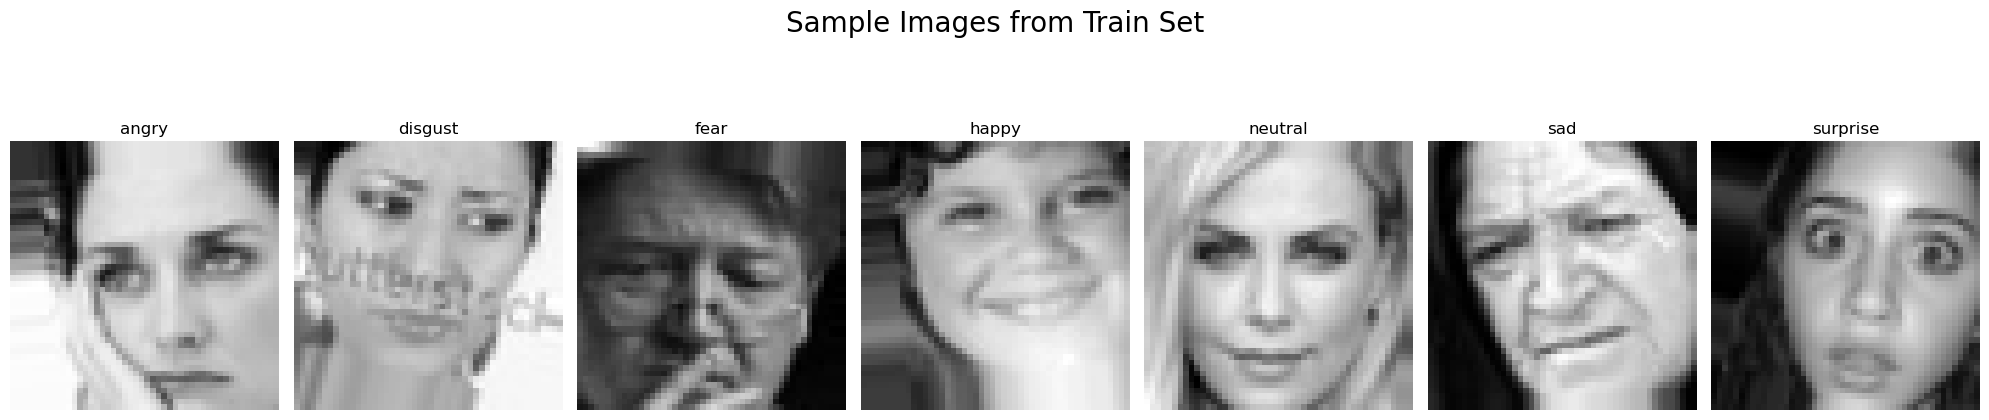

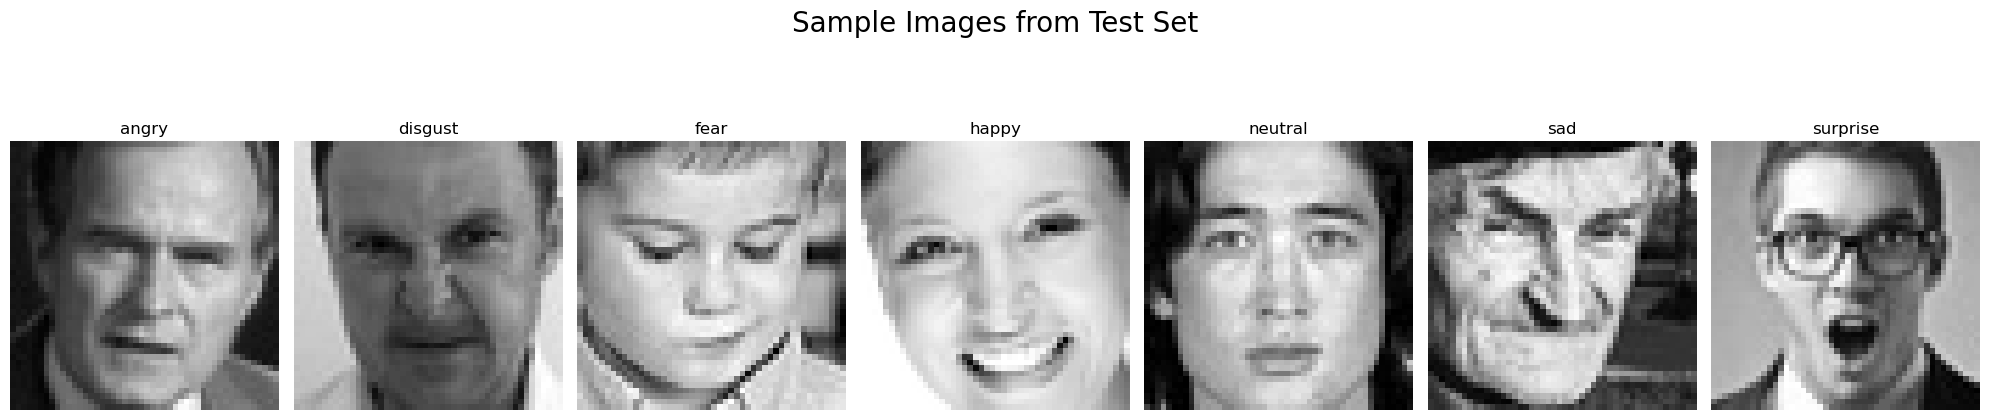

In [80]:
def plot_sample_images(generator, class_names, title, img_size):
    """Plot sample images from a generator for each class."""
    fig, axes = plt.subplots(nrows=1, ncols=len(class_names), figsize=(20, 5))
    fig.suptitle(title, fontsize=20)

    for i, class_name in enumerate(class_names):
        for images, labels in generator:
            # Find the first image of the current class
            if np.argmax(labels, axis=1)[0] == i:
                axes[i].imshow(images[0].reshape(img_size, img_size), cmap='gray')
                axes[i].set_title(class_name, fontsize=12)
                axes[i].axis('off')
                break

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Example usage
plot_sample_images(train_generator, train_class_names, 'Sample Images from Train Set', img_size)
plot_sample_images(validation_generator, test_class_names, 'Sample Images from Test Set', img_size)


In [81]:
img_shape = (img_size, img_size, 1)

model = Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding='same', input_shape=img_shape),
    Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding='same'),
    BatchNormalization(),
    # Dropout(0.3),  # Early dropout added
    MaxPooling2D((2, 2)),

    Conv2D(filters=128, kernel_size=(3, 3), activation="relu", padding='same'),
    Conv2D(filters=128, kernel_size=(3, 3), activation="relu", padding='same'),
    BatchNormalization(),
    # Dropout(0.4),  # Early dropout added
    MaxPooling2D((2, 2)),  

    Conv2D(filters=256, kernel_size=(3, 3), activation="relu", padding='same'),
    Conv2D(filters=256, kernel_size=(3, 3), activation="relu", padding='same'),
    BatchNormalization(),
    # Dropout(0.4),  # Early dropout added
    MaxPooling2D((2, 2)), 

    Conv2D(filters=512, kernel_size=(3, 3), activation="relu", padding='same'),
    Conv2D(filters=512, kernel_size=(3, 3), activation="relu", padding='same'),
    BatchNormalization(),
    # Dropout(0.5),  # Early dropout added
    MaxPooling2D((2, 2)),

    Flatten(),

    Dense(512, activation="relu"),
    # Dropout(0.5),  # Dropout in dense layers
    Dense(512, activation="relu"),
    # Dropout(0.5),
    Dense(256, activation="relu"),
    # Dropout(0.4),
    Dense(256, activation="relu"),
    Dense(128, activation="relu"),
    Dense(128, activation="relu"),
    Dense(7, activation="softmax")  
])

model.summary()

c:\Users\Abiyyu\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        16,51

 Total params: 7,557,959 (28.83 MB)

 Trainable params: 7,556,039 (28.82 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [82]:
optimiser = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(
    optimizer=optimiser,
    loss='categorical_crossentropy',
    metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=11,
    verbose=1,
    restore_best_weights=True,
)


callbacks = [
    early_stopping,
]


In [65]:
epochs = 20
batch_size = 64

In [85]:
batch_size = 64
history = model.fit(
    train_generator,
    epochs=60, 
    validation_data=validation_generator,
    batch_size = 64,
    callbacks=callbacks,
)

Epoch 1/60
149/149 ━━━━━━━━━━━━━━━━━━━━ 82s 546ms/step - accuracy: 0.6779 - loss: 0.8403 - val_accuracy: 0.4783 - val_loss: 1.4429
Epoch 2/60
149/149 ━━━━━━━━━━━━━━━━━━━━ 77s 514ms/step - accuracy: 0.6868 - loss: 0.8257 - val_accuracy: 0.6617 - val_loss: 0.9096
Epoch 3/60
149/149 ━━━━━━━━━━━━━━━━━━━━ 75s 502ms/step - accuracy: 0.7020 - loss: 0.7974 - val_accuracy: 0.6481 - val_loss: 0.9153
Epoch 4/60
149/149 ━━━━━━━━━━━━━━━━━━━━ 75s 501ms/step - accuracy: 0.7144 - loss: 0.7792 - val_accuracy: 0.6250 - val_loss: 1.0324
Epoch 5/60
149/149 ━━━━━━━━━━━━━━━━━━━━ 75s 500ms/step - accuracy: 0.7177 - loss: 0.7446 - val_accuracy: 0.6277 - val_loss: 0.9307
Epoch 6/60
149/149 ━━━━━━━━━━━━━━━━━━━━ 75s 501ms/step - accuracy: 0.7380 - loss: 0.7189 - val_accuracy: 0.5883 - val_loss: 1.1540
Epoch 7/60
149/149 ━━━━━━━━━━━━━━━━━━━━ 75s 503ms/step - accuracy: 0.7331 - loss: 0.7046 - val_accuracy: 0.6236 - val_loss: 1.0431
Epoch 8/60
149/149 ━━━━━━━━━━━━━━━━━━━━ 75s 504ms/step - accuracy: 0.7442 - loss: 0

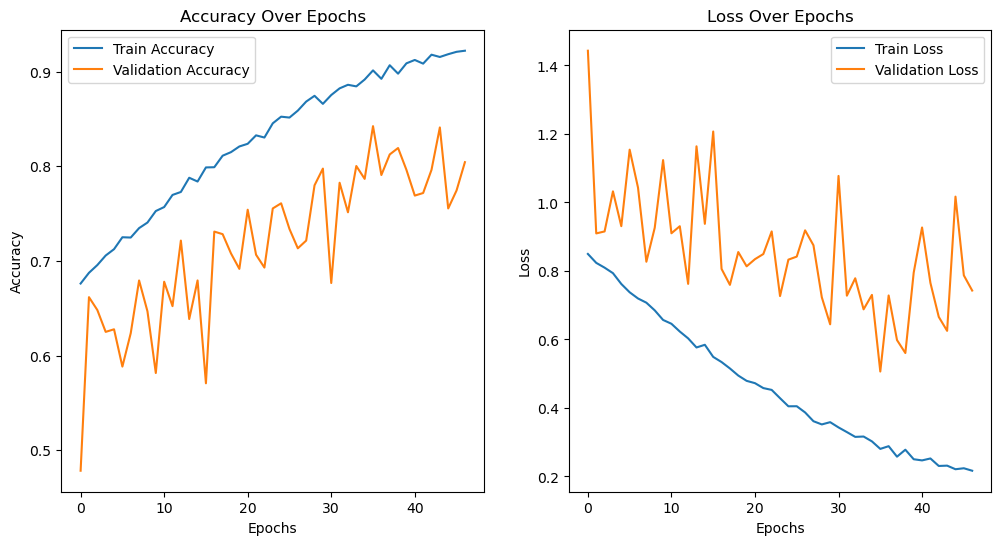

In [86]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 155ms/step


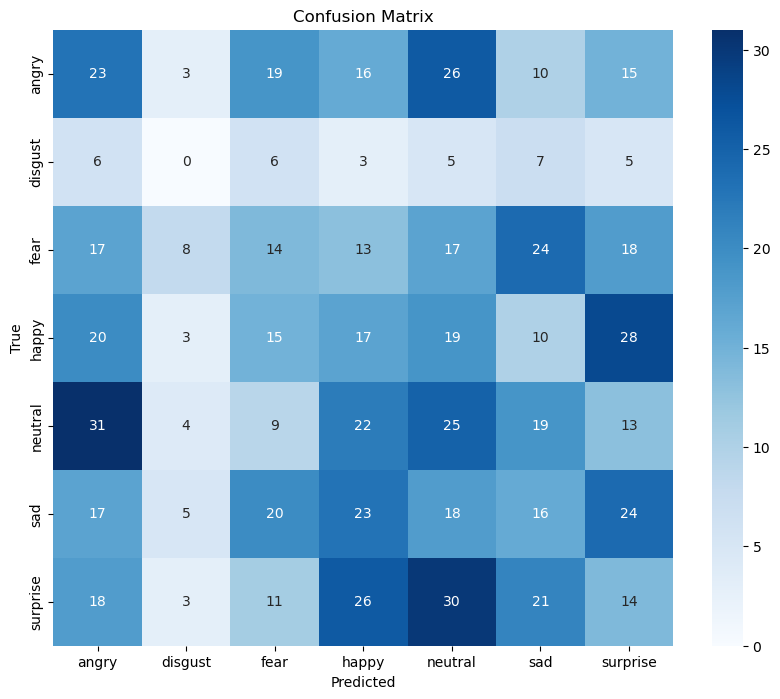

              precision    recall  f1-score   support

       angry       0.17      0.21      0.19       112
     disgust       0.00      0.00      0.00        32
        fear       0.15      0.13      0.14       111
       happy       0.14      0.15      0.15       112
     neutral       0.18      0.20      0.19       123
         sad       0.15      0.13      0.14       123
    surprise       0.12      0.11      0.12       123

    accuracy                           0.15       736
   macro avg       0.13      0.13      0.13       736
weighted avg       0.15      0.15      0.15       736



In [87]:
# Evaluasi model pada test set
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = validation_generator.classes

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_true, y_pred_classes, target_names=validation_generator.class_indices.keys()))


In [88]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

149/149 ━━━━━━━━━━━━━━━━━━━━ 21s 141ms/step - accuracy: 0.8815 - loss: 0.3281
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - accuracy: 0.8401 - loss: 0.5059
final train accuracy = 88.19 , validation accuracy = 84.24


In [90]:
save_dir = 'C:\\Users\\Abiyyu\\Documents\\ML\\models'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Save the trained model
model.save(os.path.join(save_dir, 'cody_84.24%.h5'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


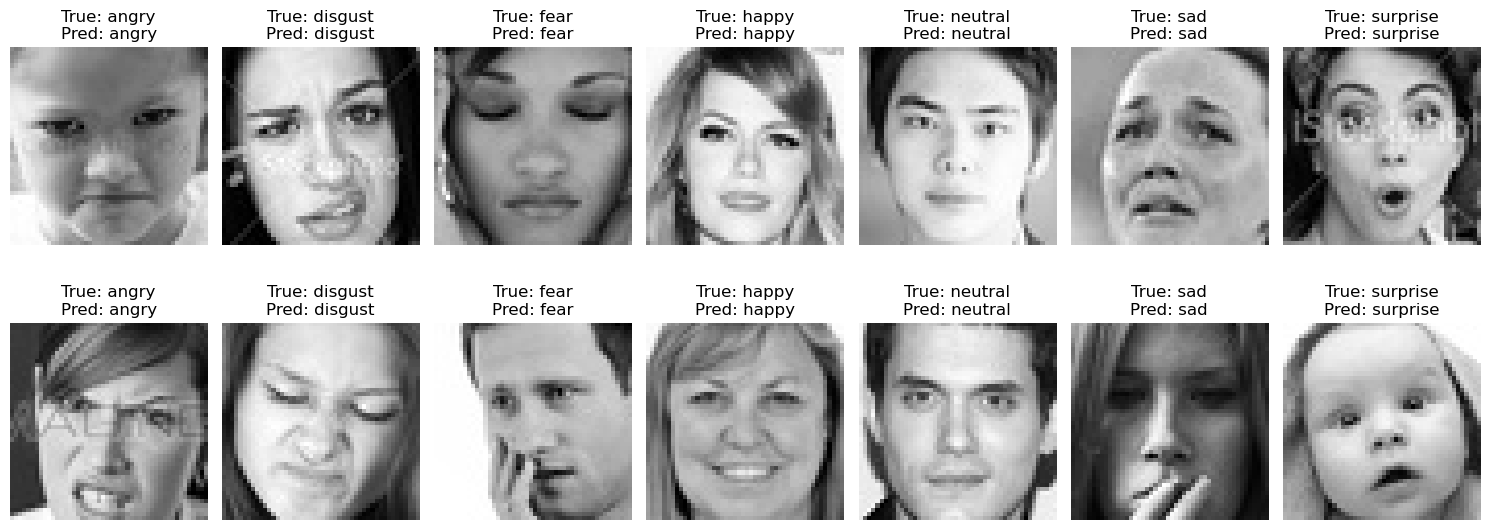

In [105]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load and preprocess images from external dataset
def load_external_images(dataset_path, img_size):
    class_names = os.listdir(dataset_path)
    images, labels = [], []

    for label, class_name in enumerate(class_names):
        class_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_path):
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                img = load_img(img_path, target_size=(img_size, img_size), color_mode='grayscale')
                img_array = img_to_array(img) / 255.0  # Normalize
                images.append(img_array)
                labels.append(label)

    return np.array(images), np.array(labels), class_names

# Predict and display results
def predict_and_display(model, images, labels, class_names, img_size):
    fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(15, 6))

    for i, class_name in enumerate(class_names):
        class_indices = np.where(labels == i)[0]
        selected_indices = class_indices[:2]  # Select up to 2 images per class

        for j, idx in enumerate(selected_indices):
            img = images[idx]
            prediction = model.predict(np.expand_dims(img, axis=0))
            predicted_class = class_names[np.argmax(prediction)]

            ax = axes[j, i]
            ax.imshow(img.reshape(img_size, img_size), cmap='gray')
            ax.set_title(f"True: {class_name}\nPred: {predicted_class}")
            ax.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage
# Set dataset path and image size
external_dataset_path = "testing"
img_size = 48  # Replace with the size used in your model

# Load external images
external_images, external_labels, external_class_names = load_external_images(external_dataset_path, img_size)

# Predict and display results
predict_and_display(model, external_images, external_labels, external_class_names, img_size)
